#1

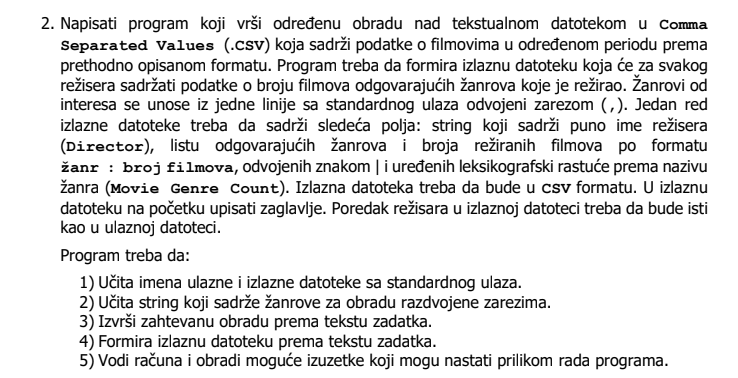

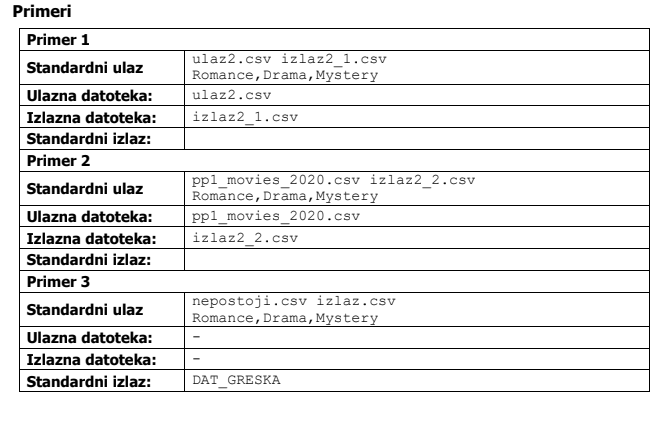

In [41]:
import csv

ulaz = 'ulaz2.csv'

genres = ['Drama', 'Mystery', 'Romance'] # input('Unesi zanrove od interesa: ')

"""
directors = {
    ime1rezisera : {
        'Action': br_action_filmova,
        'Romance': br_romance_filmova,
        ...
    },
    ime2rezisera : {
        'Drama': broj_drama,
        'Romance': broj_romance,
    },
    ime3rezisera : ,
    ...
}

directors = {
    'Zack stagod' : {
        'Action' : 0,
        'Drama' : 0...
    },
    'Faustina' : {}
    
}
"""

directors = {}

all_genres = []

with open(ulaz, 'r', encoding="utf-8-sig") as fajl, open('izlaz1.csv', 'w') as izlaz:
    reader = csv.DictReader(fajl, delimiter=';', fieldnames=['ID', 'Movie Title', 'Movie Genre', 'Issued', 'Director', 'Revenue'])
    
    # iteriramo red po red ulazne datoteke
    for row in reader:
        # iz reda asocijativno izdvajamo ime rezisera
        ime_rezisera = row['Director']
        # ukoliko prvi put nailazimo na njega, za njega kreiramo prazan podrecnik zanrova
        if ime_rezisera not in directors.keys():
            directors[ime_rezisera] = {}
        
        # izdvojimo u listu sve zanrove u koje film na trenutnom row-u spada
        zanrovi = row['Movie Genre'].split('|') # 'Action|Romance|Thriller' -> ['Action', 'Romance', 'Thriller']

        # za svaki od tih zanrova
        for zanr in zanrovi:
            # ubacujemo novi zanr u listu svih mogucih zanrova
            if zanr not in all_genres:
                all_genres.append(zanr)

            # ukoliko reziser vec nije rezirao film tog zanra
            if zanr not in directors[ime_rezisera].keys():
                # ovo mu je prvi
                directors[ime_rezisera][zanr] = 1
            else:
                # inace je vec rezirao filmove tog tipa, inkrementiraj broj
                directors[ime_rezisera][zanr] += 1
    
    # zavrseno parsiranje ulaznog fajla, formiramo izlaz
    for director, zanrovi in directors.items():
        # jedini zez je sto postoje reziseri koji nemaju odredjene zanrove
        # daj da im dodamo te zanrove i zakucamo ih na nulu
        for z in all_genres:
            if z not in zanrovi.keys():
                directors[director][z] = 0
        
        # formiramo izlaz tipa 'Zack Illsley;Drama : 2|Mystery : 1|Romance : 2'
        izlazniString = ''
        izlazniString += director + ';'

        # za svaki od njegovih zanrova, bitni su nam samo oni koje je korisnik
        # u listi genres trazio
        for z, br in zanrovi.items():
            if z in genres:
                izlazniString += z + " : " + str(br) + '|'
            
        # ispisemo taj string
        izlaz.write(izlazniString + '\n')   

---
#2

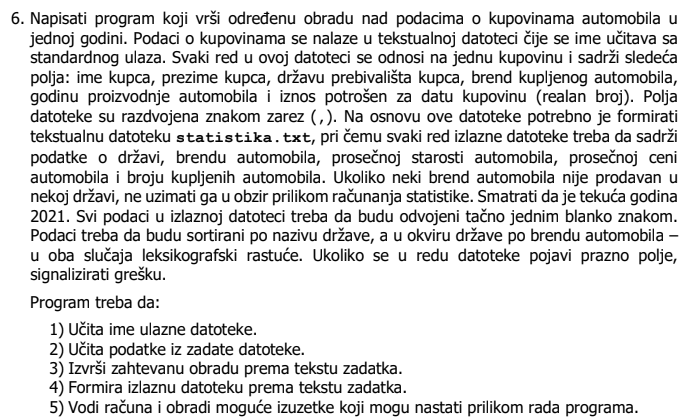

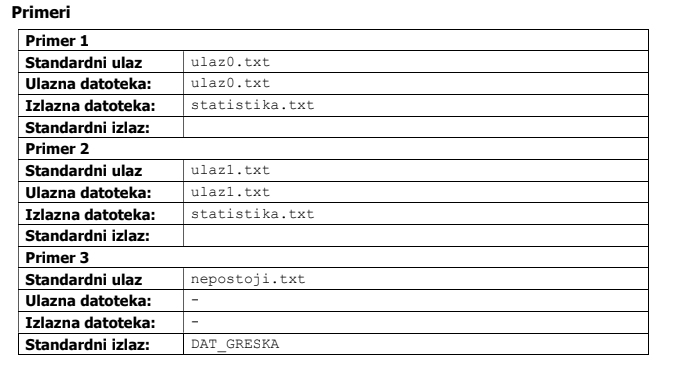

In [57]:
"""
drzave_dict[Amerika][BWM][Ukupna cena]
drzave_dict = 
{
    Amerika: {
        Audi: {
            'Ukupna starost': gg,
            'Ukupna cena': eur,
            'Broj auta: br
        },
        BMW: {
            'Ukupna starost': gg,
            'Ukupna cena': eur,
            'Broj auta: br
        },
    },

    Srbija: {

    }
}

"""

import csv

# Unosimo ime ulazne i izlazne datoteke
ulaz = "ulaz0.txt" #input().split()
izlaz = "izlaz.csv" #input().split(",")

# prazan veliki recnik - baza drzava
drzave_dict = {} 

with open(ulaz, 'r') as csv_file:
    # koristimo csv.DictReader jer je napravljen za csv
    csv_reader = csv.DictReader(
                csv_file, \
                fieldnames=["Ime", "Prezime", "Drzava", "Brend", "Godina", "Iznos"], \
                delimiter=','
            )
        
    # sada u row vise nije jedan veliki string nego recnik
    for row in csv_reader:
        drzava = row['Drzava']
        brend = row['Brend']

        if drzava not in drzave_dict.keys():
            # po prvi put nailazimo na drzavu, samim tim i svaki brend u okviru
            # te drzave je po prvi put
            #if brend not in drzave_dict[drzava].keys() ovo nema smisla
            drzave_dict[drzava] = {}
            drzave_dict[drzava][brend] = {}
            drzave_dict[drzava][brend]['Ukupna starost'] = 2021 - int(row['Godina'])
            drzave_dict[drzava][brend]['Ukupna cena'] = float(row['Iznos'])
            drzave_dict[drzava][brend]['Broj'] = 1

        else:
            # ako smo vec nailazili na ovu drzavu
            # da li smo vec naisli na ovu marku automobila?
            if brend not in drzave_dict[drzava].keys():
                # formiramo taj brend po prvi put u okviru te drzave
                drzave_dict[drzava][brend] = {}
                drzave_dict[drzava][brend]['Ukupna starost'] = 2021 - int(row['Godina'])
                drzave_dict[drzava][brend]['Ukupna cena'] = float(row['Iznos'])
                drzave_dict[drzava][brend]['Broj'] = 1
            else:
                drzave_dict[drzava][brend]['Ukupna starost'] += 2021 - int(row['Godina'])
                drzave_dict[drzava][brend]['Ukupna cena'] += float(row['Iznos'])
                drzave_dict[drzava][brend]['Broj'] += 1

# unutar drzave treba sortirati recnik koji sadrzi imena automobila rastuce leksikografski
for drzava, brendovi in drzave_dict.items():
    # uzmem taj recnik, pretvorim ga u listu tuplova, sortiram listu, vratim nazad u novi recnik
    b = dict(sorted(brendovi.items()))
    # i taj recnik nalepim na mesto starog
    drzave_dict[drzava] = b

# sortiram po imenima drzava unutar velikog recnika
drzave_dict = dict(sorted(drzave_dict.items()))

# zavrsili smo parsiranje ulaznog fajla
with open(izlaz, 'w') as izlazniFajl:
    for drzava, brendovi in drzave_dict.items():
        for brend in brendovi:
            izlazniString = f"{drzava} {brend} {drzave_dict[drzava][brend]['Ukupna starost']/drzave_dict[drzava][brend]['Broj']} {drzave_dict[drzava][brend]['Ukupna cena']/drzave_dict[drzava][brend]['Broj']:.2f} {drzave_dict[drzava][brend]['Broj']} \n"

            izlazniFajl.write(izlazniString)